In [1]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading the dataset
# the data is in excel format

df=pd.read_excel(r"C:\Users\Admin\Downloads\datasets_140442_330428_Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# looking at the shape of the dataset

print("Shape of the dataset: ",df.shape)

Shape of the dataset:  (10683, 11)


In [4]:
# Checking the info

print("The info of the dataset",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB
The info of the dataset None


In [5]:
# only price is int value rest all are object

# EDA

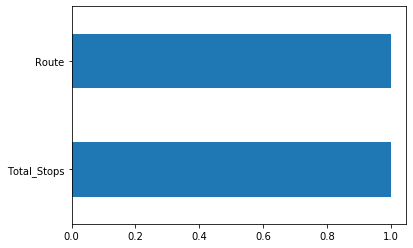

In [6]:
# checking for missing values

missing_val=df.isnull().sum()
missing_val=missing_val[missing_val>0]
missing_val.sort_values(ascending=False).plot(kind='barh')

In [7]:
# retrieving the missing row
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
# Route and total stops has missing values in the same row. the row can be dropped as no more information loss

In [9]:
# dropping the missing rows
df.drop(9039,inplace=True)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
# The dataset has no missing values

In [12]:
# Date_of_journey, dep_time,arriavaltime,Duration should be converted to datatime

In [13]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

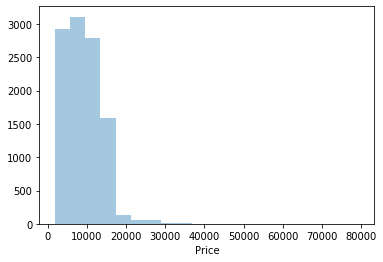

In [14]:
sns.distplot(df.Price,bins=20,kde=False)

In [15]:
# The price is slightly skewed

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
*****************************************************************************************************************************


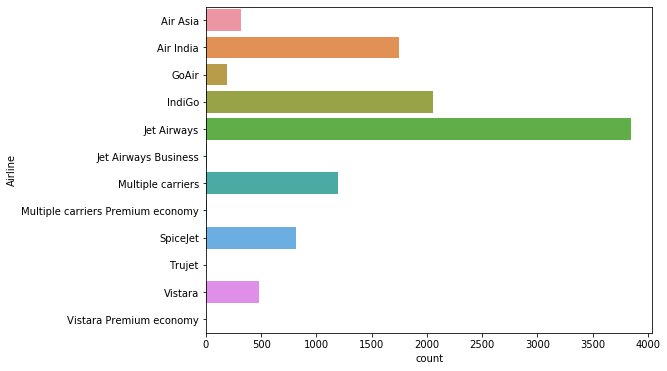

In [16]:
print(df['Airline'].value_counts())
print("*"*125)
plt.figure(figsize=(8,6))
sns.countplot(y=df.Airline.sort_values())

In [17]:
# Airlines available in different sources
print(df.groupby("Source")["Airline"].value_counts())

Source    Airline                          
Banglore  Jet Airways                           788
          IndiGo                                523
          Air India                             332
          Vistara                               185
          SpiceJet                              181
          GoAir                                  93
          Air Asia                               89
          Jet Airways Business                    4
          Vistara Premium economy                 2
Chennai   IndiGo                                184
          SpiceJet                              128
          Vistara                                43
          Air India                              25
          Vistara Premium economy                 1
Delhi     Jet Airways                          1586
          Multiple carriers                    1196
          Air India                             746
          IndiGo                                705
          SpiceJet  

Text(0.5, 1.0, 'Different airline available in different sources')

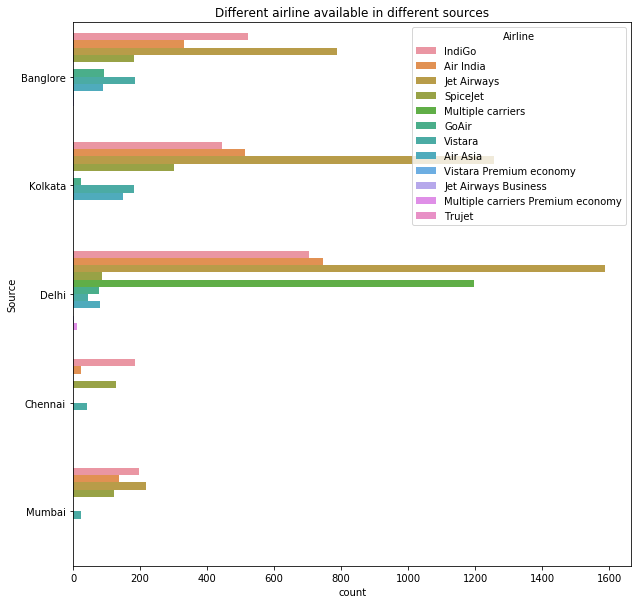

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(y='Source',hue='Airline',data=df)
plt.title("Different airline available in different sources")

Source
Banglore     6121
Chennai      3850
Delhi       10262
Kolkata      9345
Mumbai       3342
Name: Price, dtype: int64
____________________________________________________________________________________________________


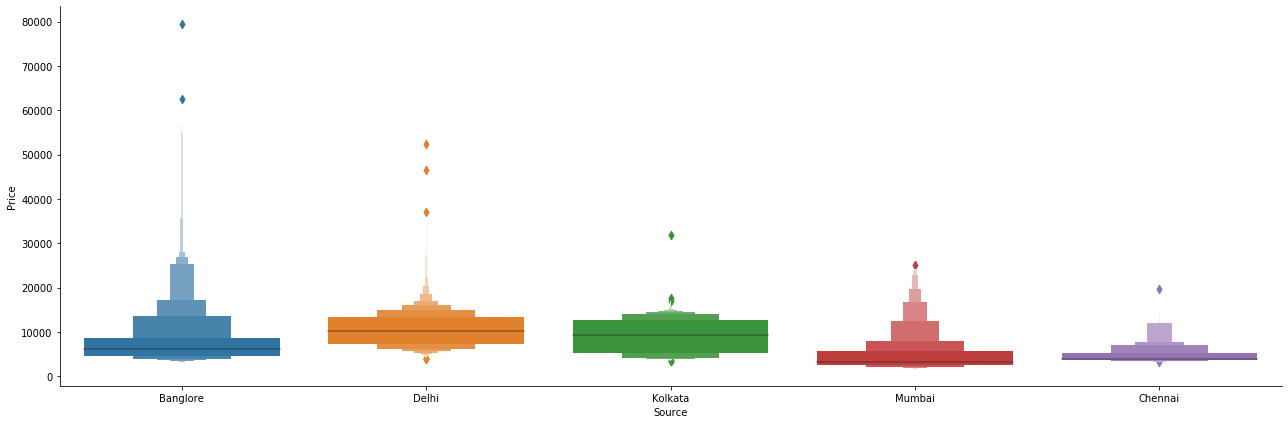

In [19]:
#Price v/s source
print(df.groupby('Source')['Price'].median())
print("_"*100)
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Airline
Jet Airways Business                 54747
Jet Airways                          11467
Multiple carriers Premium economy    11269
Multiple carriers                    10197
Air India                             9443
Vistara Premium economy               9125
Vistara                               7980
Air Asia                              5162
GoAir                                 5135
IndiGo                                5000
Trujet                                4140
SpiceJet                              3873
Name: Price, dtype: int64
____________________________________________________________________________________________________


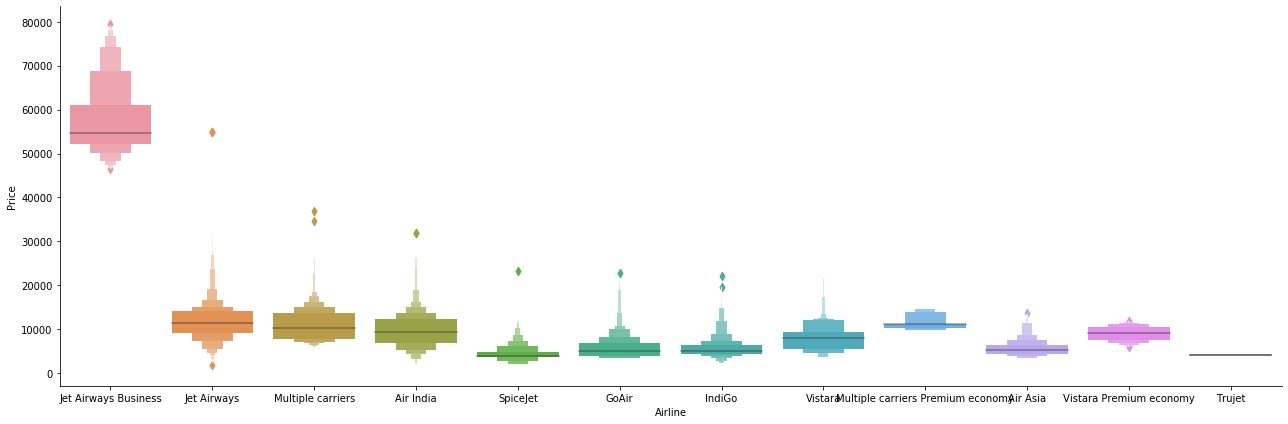

In [20]:
# Airline v/s price
print(df.groupby('Airline')['Price'].median().sort_values(ascending=False))
print("_"*100)
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [21]:
# Almost all the airlines has similar median

In [22]:
# Exploring categorical variable

cat_col=[x for x in df.columns if df[x].dtypes=="O"and x not in ['Date_of_Journey','Dep_Time', 'Arrival_Time', 'Duration']]
print("The categoriacal columns in the dataset",cat_col)
print("_"*125)
df[cat_col].head()

The categoriacal columns in the dataset ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
_____________________________________________________________________________________________________________________________


,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [24]:
# dealing with Date_of_journey, dep_time,arriavaltime,Duration 
# converting date_of_journey column into datetime

df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')

#Extracting day and month from date_of_journey column

df['day_of_journey']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day
df['month_of_journey']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [25]:
# dealing with dep_time column
# extracting hours and minute from dep_time column

df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [26]:
# Now Extracting hours and minute from Arrival_Time

df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [27]:
# handling duration column
# converting duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

dur_hours = []
dur_mins = []
for i in range(len(duration)):
    dur_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    dur_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [28]:
df["dur_hour"]=dur_hours
df['dur_mins']=dur_mins

In [29]:
# since we have extracted many information from Date_of_journey, dep_time,arriavaltime,Duration 
# those columns can be removed from the dataset

df.drop(['Date_of_Journey','Dep_Time', 'Arrival_Time', 'Duration'],axis=1,inplace=True)

In [30]:
# Now dealing with categorical columns

df[cat_col].head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [31]:
# checking the nunique for each categorical column

for col in cat_col:
    print("Number of uniques in ",col,df[col].nunique())


Number of uniques in  Airline 12
Number of uniques in  Source 5
Number of uniques in  Destination 6
Number of uniques in  Route 128
Number of uniques in  Total_Stops 5
Number of uniques in  Additional_Info 10


In [32]:
# checking the nunique and value counts for each categorical column
for feature in cat_col:
    print("Value counts in",feature)
    print(df[feature].value_counts())
    print("*"*70)

Value counts in Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
**********************************************************************
Value counts in Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
**********************************************************************
Value counts in Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
# route can be removed as route information can be extract from source and destination column
# Additional_Info can be dropped as it no productive information can be retrieved from it

df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [34]:
# dealing with Airline, source,destination and total stops column
# airlines, source and destination can be converted into dummies using one hot encoding
# totalstops column can be deal with label encoding
# lets handle one by one

In [35]:
airline=pd.get_dummies(df['Airline'],drop_first=True)
source=pd.get_dummies(df['Source'],drop_first=True)
destination=pd.get_dummies(df['Destination'],drop_first=True)

In [36]:
totalstopsmap={"non-stop":0,
              '1 stop':1,
              '2 stops':2,
              '3 stops':3,
              '4 stops':4}
df['totalstop']=df['Total_Stops'].map(totalstopsmap)

In [37]:
# dropping airline, source, destination  and totalstops coulmn as we required no more
df.drop(['Airline', 'Source', 'Destination', 'Total_Stops'],axis=1,inplace=True)

In [38]:
# concatinating created dummy variables for airline, source, destination coulmn
train=pd.concat([df,airline,source,destination],axis=1)

In [39]:
# Dealing with test data

In [40]:
# cleaning test data
# importing test data

df1=pd.read_excel(r"C:\Users\Admin\Downloads\datasets_140442_330428_Test_set.xlsx")

In [41]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [42]:
# checking for missing values
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [43]:
# handling date_of_journey, dep_time, arrival_time and duration

df1['day_of_journey']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.day
df1['month_of_journey']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.month

df1['Dep_hour']=pd.to_datetime(df1['Dep_Time']).dt.hour
df1['Dep_min']=pd.to_datetime(df1['Dep_Time']).dt.minute

df1['Arrival_hour']=pd.to_datetime(df1['Arrival_Time']).dt.hour
df1['Arrival_min']=pd.to_datetime(df1['Arrival_Time']).dt.minute

duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

dur_hours = []
dur_mins = []
for i in range(len(duration)):
    dur_hours.append(int(duration[i].split(sep = "h")[0]))    
    dur_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [44]:
df1["dur_hour"]=dur_hours
df1['dur_mins']=dur_mins

df1.drop(['Date_of_Journey','Dep_Time', 'Arrival_Time', 'Duration'],axis=1,inplace=True)

In [45]:
df1.drop(['Route','Additional_Info'],axis=1,inplace=True)

airline=pd.get_dummies(df1['Airline'],drop_first=True)
source=pd.get_dummies(df1['Source'],drop_first=True)
destination=pd.get_dummies(df1['Destination'],drop_first=True)

totalstopsmap={"non-stop":0,
              '1 stop':1,
              '2 stops':2,
              '3 stops':3,
              '4 stops':4}
df1['totalstop']=df1['Total_Stops'].map(totalstopsmap)

df1.drop(['Airline', 'Source', 'Destination', 'Total_Stops'],axis=1,inplace=True)

In [46]:
test=pd.concat([df1,airline,source,destination],axis=1)

In [47]:
train.to_csv("flight.csv",index=False)